# 🧩 Fase 6 – Visualización de Datos

🎯 **Objetivo:**  
Consumir los datos almacenados en la base de datos **SaludDigital_2025** y generar reportes visuales  
con Python (matplotlib, seaborn y pandas).

Se mostrarán los siguientes análisis:
1. Gráfico de barras → Número de pacientes atendidos por servicio.  
2. Gráfico circular → Distribución por sexo.  
3. Histograma → Distribución de edades.  
4. Reporte tabular → Promedio de montos por distrito.

In [1]:
# ==========================================
# 📚 1️⃣ Importar librerías y conectar a MongoDB
# ==========================================

# Si no las tienes instaladas, puedes ejecutar en consola:
# pip install matplotlib seaborn pandas pymongo

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pathlib import Path

# 🔹 Conectar con MongoDB
client = MongoClient("mongodb://localhost:27017/")
db = client["SaludDigital_2025"]
collection = db["pacientes"]

# 🔹 Leer datos desde la colección
data = list(collection.find({}, {"_id": 0}))
df = pd.DataFrame(data)

print("✅ Datos cargados desde MongoDB correctamente.")
print(f"📊 Total de registros: {len(df)}\n")
print("Vista previa de los datos:")
print(df.head())


✅ Datos cargados desde MongoDB correctamente.
📊 Total de registros: 3000

Vista previa de los datos:
  id_paciente  nombre  edad             sexo    distrito     servicio  \
0       P0001  Carlos  61.0                M  Los Olivos  Cardiología   
1       P0002   Pedro  73.0  No especificado       Comas    Pediatría   
2       P0003   Pedro  71.0                M  San Isidro   Emergencia   
3       P0004    Luis  52.0  No especificado  Miraflores    Pediatría   
4       P0005   Jorge  26.0  No especificado  Miraflores  Odontología   

  fecha_atencion   monto  
0     2023-08-24  654.38  
1     2025-08-19    0.00  
2     2021-08-07    0.00  
3     2022-11-19    0.00  
4     2022-05-19    0.00  


In [2]:
# Crear carpeta "reports" si no existe
reports_path = Path.cwd() / "../reports"
reports_path.mkdir(parents=True, exist_ok=True)

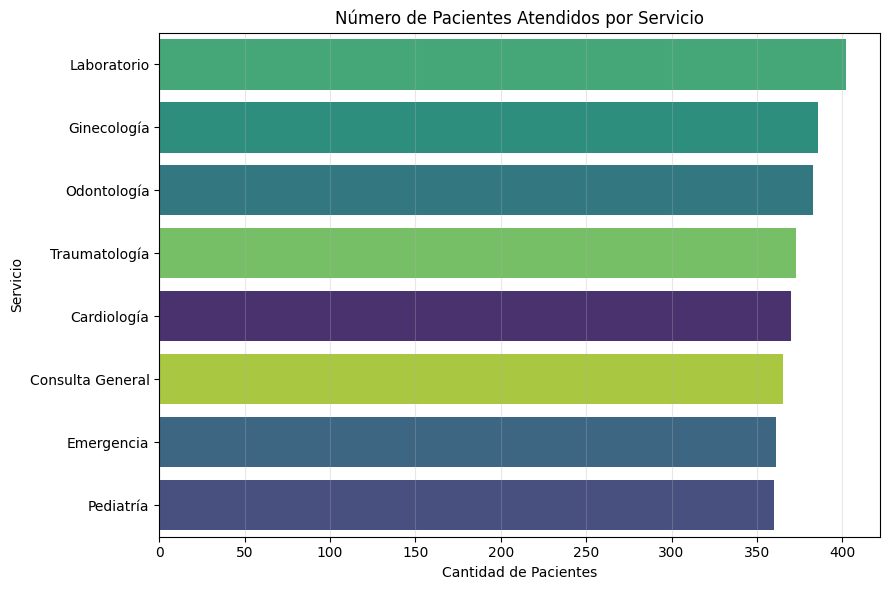

In [3]:
# ==========================================
# 📊 1️⃣ Número de pacientes atendidos por servicio
# ==========================================

plt.figure(figsize=(9,6))
sns.countplot(
    y="servicio",
    hue="servicio",
    data=df,
    order=df["servicio"].value_counts().index,
    palette="viridis",
    legend=False
)
plt.title("Número de Pacientes Atendidos por Servicio")
plt.xlabel("Cantidad de Pacientes")
plt.ylabel("Servicio")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "pacientes_atendidos_por_servicio.png")
plt.show()


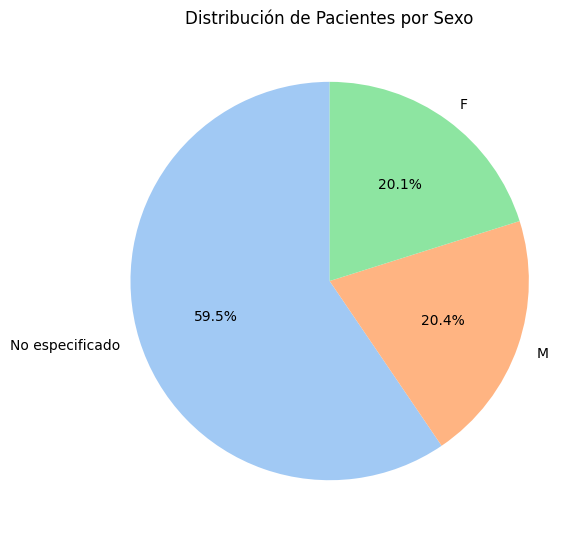

In [4]:
# ==========================================
# 🧬 2️⃣ Distribución de pacientes por sexo
# ==========================================

sexo_counts = df["sexo"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    sexo_counts,
    labels=sexo_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")
)
plt.title("Distribución de Pacientes por Sexo")
plt.tight_layout()
plt.savefig(reports_path / "distribucion_por_sexo.png")
plt.show()


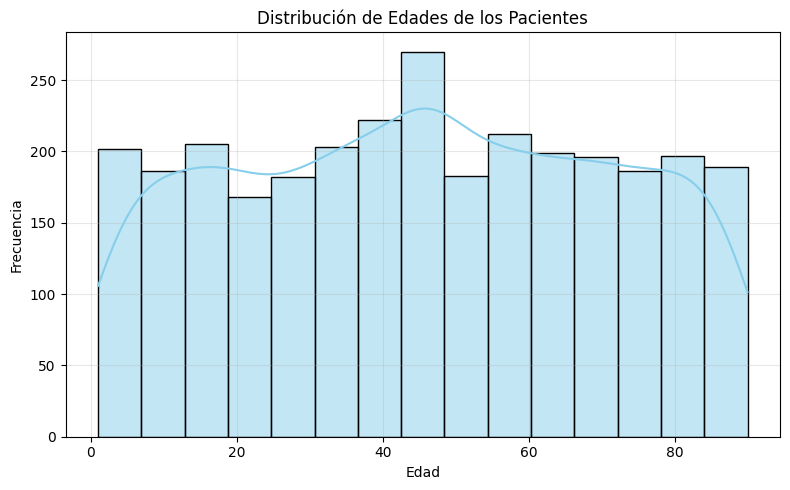

In [5]:
# ==========================================
# 📈 3️⃣ Distribución de edades de los pacientes
# ==========================================

plt.figure(figsize=(8,5))
sns.histplot(df["edad"], bins=15, kde=True, color='skyblue')
plt.title("Distribución de Edades de los Pacientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "distribucion_de_edades.png")
plt.show()


🏙️ Promedio de montos por distrito:

                 Distrito  PromedioMonto
0              Miraflores     251.614476
1  San Juan de Lurigancho     250.923344
2              San Miguel     244.264140
3                   Comas     233.372500
4              San Isidro     230.578400
5                  Callao     225.181211
6                   Surco     207.074085
7              Los Olivos     206.218942
8                    Lima     204.565017
9       Villa El Salvador     196.054595


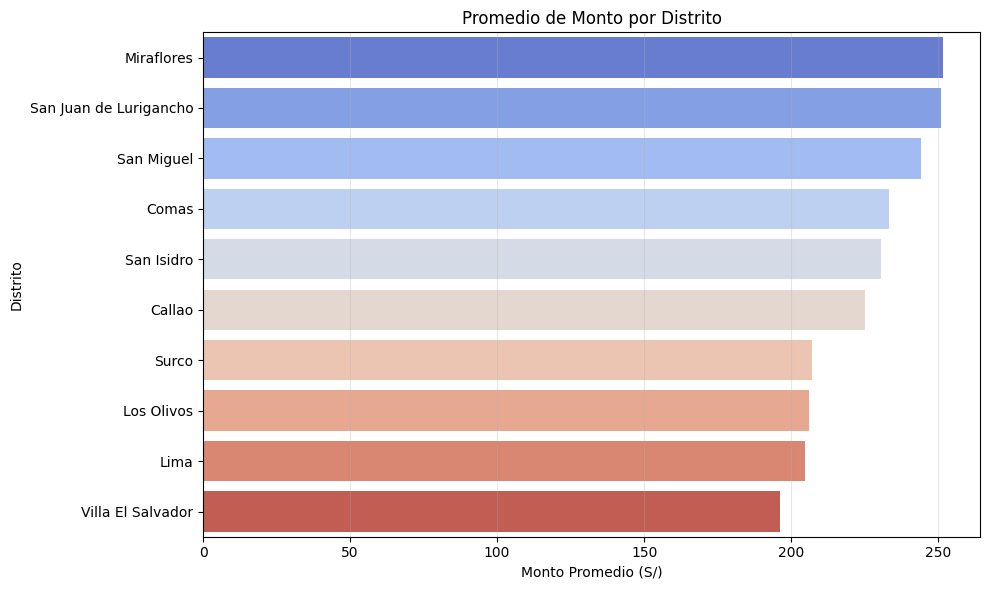

In [6]:
# ==========================================
# 💰 4️⃣ Promedio de montos por distrito
# ==========================================

promedio_monto = df.groupby("distrito")["monto"].mean().sort_values(ascending=False)
tabla_promedio = promedio_monto.reset_index()
tabla_promedio.columns = ["Distrito", "PromedioMonto"]

print("🏙️ Promedio de montos por distrito:\n")
print(tabla_promedio)

# Guardar el gráfico también
plt.figure(figsize=(10,6))
sns.barplot(
    data=tabla_promedio,
    x="PromedioMonto",
    y="Distrito",
    hue="Distrito",
    palette="coolwarm",
    legend=False
)
plt.title("Promedio de Monto por Distrito")
plt.xlabel("Monto Promedio (S/)")
plt.ylabel("Distrito")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig(reports_path / "promedio_de_montos_por_distrito.png")
plt.show()
